# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

# Load and Explore the Dataset

In [2]:
# Load the dataset
train_path = 'E:/Imarticus PG Data science class/DL + AI Exam Paper/Dataset/RNN/tweets_train.csv'
test_path = 'E:/Imarticus PG Data science class/DL + AI Exam Paper/Dataset/RNN/tweets_test.csv'
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [3]:
# Display the first few rows and basic info
train_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
0,Romy 👑,Bolton - England,"Tables turn, bridges burn, you live and learn.",2009-06-15 09:00:39,525,896,3854,False,2020-09-19 15:19:32,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TLynn Peterson,"Black Canyon City, Arizona",Acquired disability ♿ after an accident. Livin...,2013-05-29 00:17:46,5045,5374,48152,False,2020-09-13 00:31:46,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma If we don t agree on what is ...,Positive
2,Rutger Kosters,Netherlands,Cloud Solution Architect @NetApp | VCDX #209 |...,2014-10-07 09:34:10,574,251,1070,False,2020-09-09 21:10:33,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma scary to see social ...,Negative
3,IDFWU🗯🇿🇼🇿🇦,"East London, South Africa","YOU HAVE OPTIONS, YOU CAN’T JUST TAKE WHAT LIF...",2012-08-22 11:09:06,706,618,1320,False,2020-09-11 04:33:08,NaN,Twitter for Android,False,You check your social media before you pee in ...,Positive
4,Treebel,NaN,NaN,2010-09-25 07:25:31,9,13,55,False,2020-09-17 16:27:38,['thesocialdilemma'],Twitter for iPhone,False,watch thesocialdilemma and see what s actually...,Negative


In [4]:
test_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text
0,Doug Webb,Probably Europe,"I develop methods for effective cooperation, w...",2015-12-12 15:22:58,157,228,496,False,2020-09-15 22:53:36,"['theSocialDilemma', 'joinMastodon']",Twitter Web App,False,Watch theSocialDilemma then joinMastodon
1,Dan Reynish,"Medicine Hat, Alberta",News Anchor at Noon and 5 pm on CHAT TV. Canad...,2011-09-10 12:17:10,1722,2500,13912,False,2020-09-12 04:43:03,['WeTheNorth'],Twitter Web App,False,With the 2019 2020 NBA season officially over ...
2,🌤,NaN,NaN,2011-06-01 02:23:57,880,585,205,False,2020-09-19 07:06:53,['TheSocialDilemma'],Twitter for iPhone,False,if you want to really know about people go tal...
3,“IT IS WHAT IT IS.”🇰🇪🇳🇿🇺🇸,WA,Heliophile🌞☀️• #Rugby • Wildlifer • #HIV • #So...,2009-04-17 13:35:02,1143,2692,11999,False,2020-09-12 18:28:18,"['TheSocialDilemma', 'Netflix']",Twitter for iPhone,False,Have you watched TheSocialDilemma on Netflix
4,Mahima Sood,NaN,Amy Dunne X Holly Golightly || Data Scientist ...,2018-01-26 21:57:22,18,65,263,False,2020-09-12 18:48:53,['TheSocialDilemma'],Twitter for iPhone,False,Highly recommend TheSocialDilemma on


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         16999 non-null  object
 1   user_location     13393 non-null  object
 2   user_description  15838 non-null  object
 3   user_created      17000 non-null  object
 4   user_followers    17000 non-null  int64 
 5   user_friends      17000 non-null  int64 
 6   user_favourites   17000 non-null  int64 
 7   user_verified     17000 non-null  bool  
 8   date              17000 non-null  object
 9   hashtags          13351 non-null  object
 10  source            17000 non-null  object
 11  is_retweet        17000 non-null  bool  
 12  clean_text        16992 non-null  object
 13  Sentiment         17000 non-null  object
dtypes: bool(2), int64(3), object(9)
memory usage: 1.6+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         3068 non-null   object
 1   user_location     2467 non-null   object
 2   user_description  2847 non-null   object
 3   user_created      3068 non-null   object
 4   user_followers    3068 non-null   int64 
 5   user_friends      3068 non-null   int64 
 6   user_favourites   3068 non-null   int64 
 7   user_verified     3068 non-null   bool  
 8   date              3068 non-null   object
 9   hashtags          2420 non-null   object
 10  source            3068 non-null   object
 11  is_retweet        3068 non-null   bool  
 12  clean_text        3067 non-null   object
dtypes: bool(2), int64(3), object(8)
memory usage: 269.8+ KB


# Preprocess the Text Data

Since we're using clean_text for analysis, we’ll:
1. Lowercase the text.
2. Remove special characters, URLs, and non-essential symbols.
3. Tokenize and pad the sequences to standardize input size.

In [7]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
train_data['clean_text'].head()

0    TheSocialDilemma is an eye opener isn t it ple...
1    TheSocialDilemma If we don t agree on what is ...
2    Watching TheSocialDilemma scary to see social ...
3    You check your social media before you pee in ...
4    watch thesocialdilemma and see what s actually...
Name: clean_text, dtype: object

In [9]:
# Convert text to lowercase, remove URLs, and special characters
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [10]:
train_data['clean_text'] = train_data['clean_text'].apply(clean_text)

In [11]:
test_data['clean_text'] = test_data['clean_text'].apply(clean_text)

In [12]:
train_data['clean_text'].head()

0    thesocialdilemma is an eye opener isn t it ple...
1    thesocialdilemma if we don t agree on what is ...
2    watching thesocialdilemma scary to see social ...
3    you check your social media before you pee in ...
4    watch thesocialdilemma and see what s actually...
Name: clean_text, dtype: object

In [13]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['clean_text'])
word_index = tokenizer.word_index

In [14]:
word_index

{'<OOV>': 1,
 'thesocialdilemma': 2,
 'the': 3,
 'i': 4,
 'to': 5,
 'on': 6,
 'and': 7,
 'you': 8,
 'a': 9,
 'is': 10,
 'it': 11,
 'social': 12,
 'watch': 13,
 'of': 14,
 'netflix': 15,
 's': 16,
 'this': 17,
 'media': 18,
 'that': 19,
 'in': 20,
 'are': 21,
 'for': 22,
 'watching': 23,
 'we': 24,
 't': 25,
 'if': 26,
 'watched': 27,
 'my': 28,
 'about': 29,
 'just': 30,
 'documentary': 31,
 'how': 32,
 'not': 33,
 'dilemma': 34,
 'all': 35,
 'have': 36,
 'but': 37,
 'what': 38,
 'me': 39,
 'product': 40,
 'must': 41,
 'with': 42,
 'be': 43,
 'm': 44,
 'your': 45,
 're': 46,
 'so': 47,
 'everyone': 48,
 'do': 49,
 'now': 50,
 'from': 51,
 'an': 52,
 'as': 53,
 'has': 54,
 'was': 55,
 'after': 56,
 'people': 57,
 'our': 58,
 'know': 59,
 'like': 60,
 'twitter': 61,
 'can': 62,
 'should': 63,
 'don': 64,
 'they': 65,
 'amp': 66,
 'there': 67,
 'out': 68,
 'then': 69,
 'time': 70,
 'us': 71,
 'one': 72,
 'who': 73,
 'by': 74,
 'up': 75,
 'at': 76,
 'more': 77,
 'really': 78,
 'or': 79,
 '

In [15]:
# Convert texts to sequences and pad them
train_sequences = tokenizer.texts_to_sequences(train_data['clean_text'])
max_length = 50  # Define a reasonable max length for padding based on tweet length analysis
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')

In [16]:
train_sequences

[[2, 10, 52, 98, 208, 309, 25, 11, 94, 1552, 3, 117, 14, 39, 252, 29, 11],
 [2,
  26,
  24,
  64,
  25,
  269,
  6,
  38,
  10,
  167,
  79,
  19,
  67,
  10,
  242,
  9,
  136,
  53,
  205,
  24,
  46,
  1553,
  17,
  10],
 [23, 2, 123, 5, 80, 12, 18, 10, 551, 75, 3, 580, 596, 14, 1052, 1554],
 [8,
  170,
  45,
  12,
  18,
  204,
  8,
  1762,
  20,
  3,
  530,
  79,
  1236,
  8,
  21,
  2246,
  256,
  21,
  85,
  104,
  1186,
  8,
  945],
 [13, 2, 7, 80, 38, 16, 246, 154, 6, 7, 364, 11, 16, 123, 37, 794, 167],
 [743,
  47,
  8,
  523,
  5,
  320,
  39,
  17,
  97,
  10,
  1187,
  455,
  5,
  314,
  39,
  1555,
  500,
  3,
  4297,
  6,
  79,
  95,
  2],
 [23, 2, 175, 16, 80, 32, 11, 62, 172, 191],
 [3,
  12,
  34,
  10,
  52,
  98,
  168,
  15,
  31,
  24,
  64,
  25,
  385,
  32,
  129,
  195,
  3,
  93,
  209,
  3442],
 [67, 21, 85, 130, 164, 19, 147, 83, 162, 125, 186, 176, 7, 177, 2, 4],
 [4,
  36,
  250,
  5,
  188,
  29,
  2,
  19,
  1313,
  25,
  82,
  257,
  220,
  108,
  19,
 

In [17]:
train_padded

array([[   2,   10,   52, ...,    0,    0,    0],
       [   2,   26,   24, ...,    0,    0,    0],
       [  23,    2,  123, ...,    0,    0,    0],
       ...,
       [  23,    2,  175, ...,    0,    0,    0],
       [ 228,    2,   38, ...,    0,    0,    0],
       [ 202,    3, 2141, ...,    0,    0,    0]])

In [18]:
# Convert test texts to sequences using the trained tokenizer
test_sequences = tokenizer.texts_to_sequences(test_data['clean_text'])

# Pad sequences to the same maximum length
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

# Encode Target Labels

In [19]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
train_data['Sentiment'] = label_encoder.fit_transform(train_data['Sentiment'])
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))) #optional check labels
print('mapping', le_name_mapping)

mapping {'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [20]:
train_data['Sentiment'].head()

0    1
1    2
2    0
3    2
4    0
Name: Sentiment, dtype: int32

In [21]:
y_train1 = train_data['Sentiment'].values

In [22]:
y_train1

array([1, 2, 0, ..., 1, 2, 0])

# Split Data for Training and Validation

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_padded, y_train1, test_size=0.2, random_state=42)

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(13600, 50)
(13600,)
(3400, 50)
(3400,)


In [25]:
train_padded.shape

(17000, 50)

# Define and Build the RNN Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

In [27]:
# Define model parameters
vocab_size = 5000
embedding_dim = 64

In [28]:
# Build the RNN model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: Positive, Neutral, Negative
])

# Compile the model

In [29]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [31]:
epochs = 10
batch_size = 32

In [32]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)

Epoch 1/10
425/425 - 6s - 14ms/step - accuracy: 0.6246 - loss: 0.8827 - val_accuracy: 0.6956 - val_loss: 0.8139
Epoch 2/10
425/425 - 3s - 7ms/step - accuracy: 0.7679 - loss: 0.6234 - val_accuracy: 0.7697 - val_loss: 0.6205
Epoch 3/10
425/425 - 3s - 8ms/step - accuracy: 0.8165 - loss: 0.4963 - val_accuracy: 0.8018 - val_loss: 0.5614
Epoch 4/10
425/425 - 3s - 8ms/step - accuracy: 0.8479 - loss: 0.4158 - val_accuracy: 0.7921 - val_loss: 0.6870
Epoch 5/10
425/425 - 3s - 8ms/step - accuracy: 0.8824 - loss: 0.3361 - val_accuracy: 0.7991 - val_loss: 0.6163
Epoch 6/10
425/425 - 3s - 8ms/step - accuracy: 0.9090 - loss: 0.2723 - val_accuracy: 0.7806 - val_loss: 0.6582
Epoch 7/10
425/425 - 3s - 8ms/step - accuracy: 0.9273 - loss: 0.2179 - val_accuracy: 0.7744 - val_loss: 0.7436
Epoch 8/10
425/425 - 4s - 8ms/step - accuracy: 0.9427 - loss: 0.1805 - val_accuracy: 0.7850 - val_loss: 0.7245
Epoch 9/10
425/425 - 4s - 8ms/step - accuracy: 0.9437 - loss: 0.1690 - val_accuracy: 0.7185 - val_loss: 0.9326


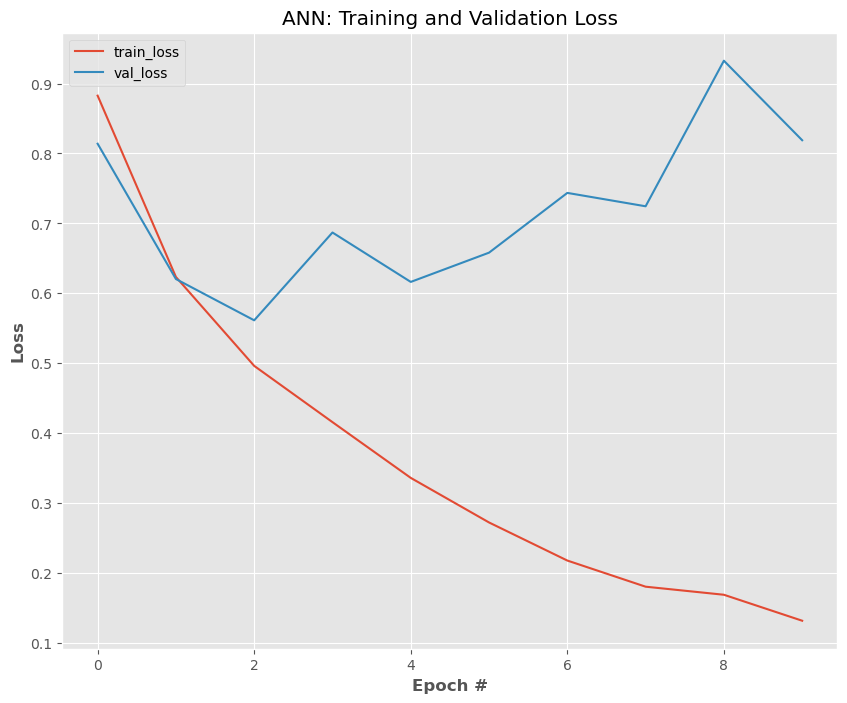

In [33]:
N= np.arange(0,epochs)
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(N,history.history['loss'],label='train_loss')
plt.plot(N,history.history['val_loss'],label='val_loss')
plt.title('ANN: Training and Validation Loss')
plt.xlabel('Epoch #',weight='bold')
plt.ylabel('Loss',weight='bold')
plt.legend()
plt.show();

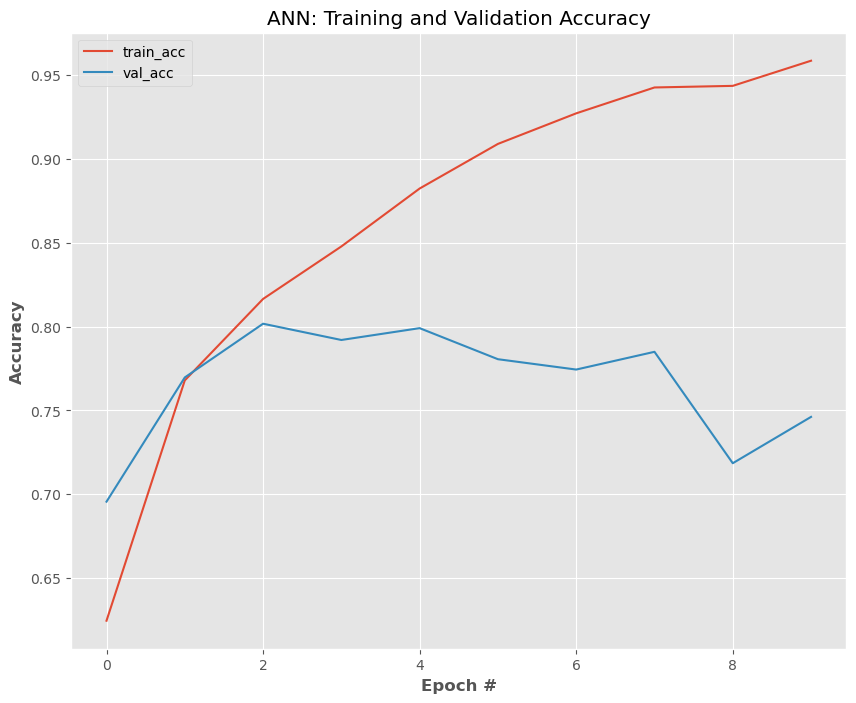

In [34]:
N= np.arange(0,epochs)
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(N,history.history['accuracy'],label='train_acc')
plt.plot(N,history.history['val_accuracy'],label='val_acc')
plt.title('ANN: Training and Validation Accuracy')
plt.xlabel('Epoch #',weight='bold')
plt.ylabel('Accuracy',weight='bold')
plt.legend()
plt.show()

In [35]:
# Predict on the validation data
val_predictions = model.predict(X_val)
val_predicted_labels = np.argmax(val_predictions, axis=1)

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [36]:
val_predictions

array([[2.4833569e-01, 2.3319764e-02, 7.2834456e-01],
       [1.5633363e-02, 9.8069203e-01, 3.6746694e-03],
       [5.3579737e-03, 1.5783735e-03, 9.9306363e-01],
       ...,
       [3.2282986e-03, 1.3964883e-02, 9.8280680e-01],
       [3.8701933e-04, 1.2230921e-04, 9.9949062e-01],
       [7.2860153e-04, 9.9860352e-01, 6.6783954e-04]], dtype=float32)

In [37]:
val_predicted_labels

array([2, 1, 2, ..., 2, 2, 1], dtype=int64)

In [38]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy:.2f}')

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7544 - loss: 0.7792
Validation Accuracy: 0.75


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy score
val_accuracy = accuracy_score(y_val, val_predicted_labels)
print(val_accuracy)
print(f'Validation Accuracy: {val_accuracy:.2f}')

0.7461764705882353
Validation Accuracy: 0.75


In [40]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_val, val_predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 251   83  245]
 [ 120 1006   86]
 [ 281   48 1280]]


In [41]:
# Display the classification report
class_report = classification_report(y_val, val_predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.38      0.43      0.41       579
     Neutral       0.88      0.83      0.86      1212
    Positive       0.79      0.80      0.80      1609

    accuracy                           0.75      3400
   macro avg       0.69      0.69      0.69      3400
weighted avg       0.76      0.75      0.75      3400



## Insights:
- a lot of fluatuations in val loss it is increasing with number of epochs and val accuracy is stable so not optimal model have to tune it.

In [42]:
# Get unique values and their counts
unique_values, counts = np.unique(y_train, return_counts=True)

In [43]:
# Print results
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 2435
Value: 1, Count: 4715
Value: 2, Count: 6450


# Tunning the RNN Model for better performance

In [91]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Bidirectional, Dropout, Dense, BatchNormalization
# Update model architecture
model1 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(SimpleRNN(64, return_sequences=True)),  # First RNN layer, bidirectional
    Dropout(0.3),
    BatchNormalization(),
    SimpleRNN(32),  # Second RNN layer, without bidirection
    Dropout(0.3),
    Dense(64, activation='relu'),  # Fully connected layer for more representation power
    Dropout(0.3),
    Dense(3, activation='softmax')  # Output layer
])

In [92]:
# Compile the model
from tensorflow.keras.optimizers import Adam
model1.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [93]:
# Train the model on the balanced dataset
history1 = model1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    verbose=2
)

Epoch 1/30
213/213 - 12s - 56ms/step - accuracy: 0.5454 - loss: 0.9890 - val_accuracy: 0.6650 - val_loss: 0.8395
Epoch 2/30
213/213 - 6s - 27ms/step - accuracy: 0.7071 - loss: 0.7636 - val_accuracy: 0.7279 - val_loss: 0.7041
Epoch 3/30
213/213 - 5s - 26ms/step - accuracy: 0.7492 - loss: 0.6643 - val_accuracy: 0.7712 - val_loss: 0.6199
Epoch 4/30
213/213 - 5s - 26ms/step - accuracy: 0.7859 - loss: 0.5577 - val_accuracy: 0.7476 - val_loss: 0.7200
Epoch 5/30
213/213 - 6s - 26ms/step - accuracy: 0.7971 - loss: 0.5189 - val_accuracy: 0.7803 - val_loss: 0.5743
Epoch 6/30
213/213 - 6s - 29ms/step - accuracy: 0.8111 - loss: 0.4781 - val_accuracy: 0.8012 - val_loss: 0.5646
Epoch 7/30
213/213 - 6s - 29ms/step - accuracy: 0.8140 - loss: 0.4755 - val_accuracy: 0.7994 - val_loss: 0.5454
Epoch 8/30
213/213 - 7s - 31ms/step - accuracy: 0.8321 - loss: 0.4445 - val_accuracy: 0.7932 - val_loss: 0.5679
Epoch 9/30
213/213 - 7s - 31ms/step - accuracy: 0.8433 - loss: 0.4302 - val_accuracy: 0.8112 - val_loss

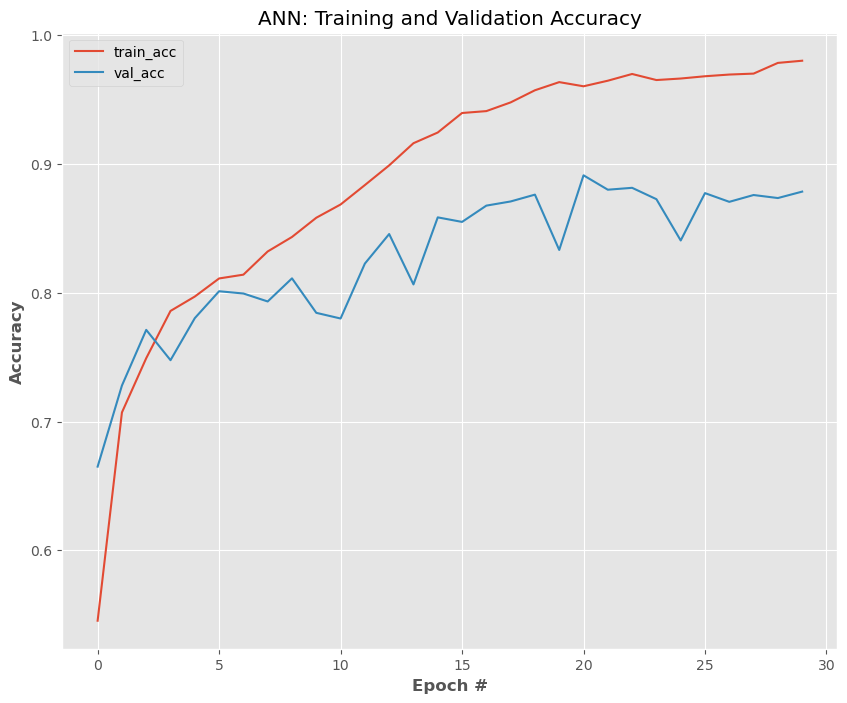

In [94]:
N= np.arange(0,30)
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(N,history1.history['accuracy'],label='train_acc')
plt.plot(N,history1.history['val_accuracy'],label='val_acc')
plt.title('ANN: Training and Validation Accuracy')
plt.xlabel('Epoch #',weight='bold')
plt.ylabel('Accuracy',weight='bold')
plt.legend()
plt.show()

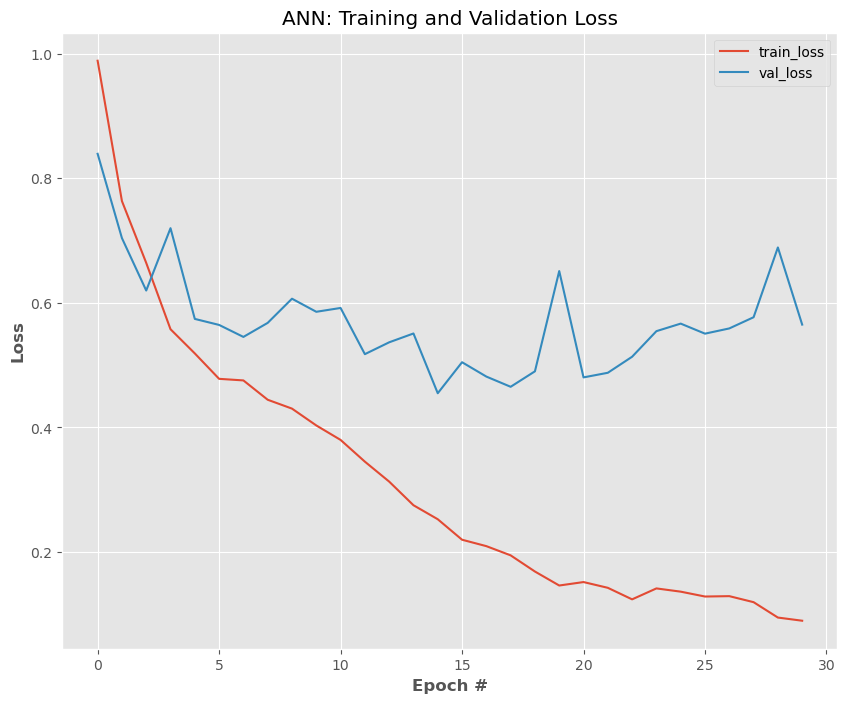

In [95]:
N= np.arange(0,30)
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(N,history1.history['loss'],label='train_loss')
plt.plot(N,history1.history['val_loss'],label='val_loss')
plt.title('ANN: Training and Validation Loss')
plt.xlabel('Epoch #',weight='bold')
plt.ylabel('Loss',weight='bold')
plt.legend()
plt.show();

In [96]:
# Predict on the validation data
val_predictions = model1.predict(X_val)
val_predicted_labels = np.argmax(val_predictions, axis=1)

107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


In [97]:
# Evaluate the model
val_loss, val_accuracy = model1.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy:.2f}')

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8718 - loss: 0.5870
Validation Accuracy: 0.88


In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy score
val_accuracy = accuracy_score(y_val, val_predicted_labels)
print(val_accuracy)
print(f'Validation Accuracy: {val_accuracy:.2f}')

0.8785294117647059
Validation Accuracy: 0.88


In [99]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_val, val_predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 395   47  137]
 [  42 1102   68]
 [  64   55 1490]]


In [100]:
# Display the classification report
class_report = classification_report(y_val, val_predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.68      0.73       579
     Neutral       0.92      0.91      0.91      1212
    Positive       0.88      0.93      0.90      1609

    accuracy                           0.88      3400
   macro avg       0.86      0.84      0.85      3400
weighted avg       0.88      0.88      0.88      3400



## Conclusion
- The Tunned RNN model name model1 is having accuracy of 88%.
- also accuracy is increasing with epochs and loss is less as per plot
- Thus i choose the above model as optimal model by comparing with base model tunned model is better in performance.
- so test data predictions can be done using model1

# Make predictions on the test data

In [101]:
# Make predictions on the test data
predictions = model1.predict(test_padded)
predicted_labels = predictions.argmax(axis=1)  # Get the index of the highest probability

96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [102]:
predicted_labels

array([1, 1, 2, ..., 1, 2, 2], dtype=int64)

## Decode numerical labels back to original sentiment labels

In [103]:
# Decode numerical labels back to original sentiment labels
predicted_sentiments = label_encoder.inverse_transform(predicted_labels)

In [104]:
predicted_sentiments

array(['Neutral', 'Neutral', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

# Create a dataframe to store the tweet and predicted sentiment

In [112]:
result_df=pd.DataFrame(test_data['clean_text'])
result_df

,clean_text
0,watch thesocialdilemma then joinmastodon
1,with the 2019 2020 nba season officially over ...
2,if you want to really know about people go tal...
3,have you watched thesocialdilemma on netflix
4,highly recommend thesocialdilemma on
...,...
3063,everybody should watch thesocialdilemma
3064,enjoyed thesocialdilemma then read this
3065,couldn t stop thinking about docu thesocialdil...
3066,this was the best one by on thesocialdilemma on


In [113]:
result_df['Predicted Sentiment']=predicted_sentiments

In [114]:
result_df.head()

,clean_text,Predicted Sentiment
0,watch thesocialdilemma then joinmastodon,Neutral
1,with the 2019 2020 nba season officially over ...,Neutral
2,if you want to really know about people go tal...,Positive
3,have you watched thesocialdilemma on netflix,Neutral
4,highly recommend thesocialdilemma on,Positive


In [115]:
result_df.shape

(3068, 2)

In [116]:
predicted_sentiments.shape

(3068,)

In [117]:
#result_df.to_csv('TheSocialDilemma_documentary_tweets_sentiment_prediction.csv',index=False,header=True)

# Conlusion
- The Tunned RNN model name model1 is having accuracy of 88%.
- also accuracy is increasing with epochs and loss is less as per plot
- Thus i choose the above model as optimal model by comparing with base model tunned model is better in performance.
- so test data predictions can be done using model1
- predictions are converted into original labels and stored in result_df along with the tweets, the predictions are stored in a csv file